# BEM114 HW1
Andrew Zabelo, Daniel Wen, Kyle McCandless

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt

## Problem 1

In [2]:
df = pd.read_csv('ps1_strategies.csv').astype('float')
ff = pd.read_csv('F-F_Research_Data_Factors.CSV').astype('float')
df_total = pd.merge(df, ff, how='inner', on=['date'])
df_total

,date,CA,LBHA,LSA,TA,HV,LV,NA,LB,HB,Mkt-RF,SMB,HML,RF
0,199001.0,-1.771984,1.498262,-7.457500,1.679061,-7.271919,0.022091,-5.392944,-1.353457,-22.772632,-7.85,-1.24,0.85,0.57
1,199002.0,1.418966,3.642659,1.054500,0.205289,-0.986167,0.062055,-1.768405,-2.118514,5.151408,1.11,0.99,0.64,0.57
2,199003.0,1.375007,1.737180,1.738500,-1.572688,-0.018665,0.341639,-0.333926,1.452434,4.480134,1.83,1.50,-2.92,0.64
3,199004.0,-0.395588,0.734520,-3.192000,2.474704,-3.294381,0.253568,-2.578905,2.123740,-10.101798,-3.36,-0.46,-2.59,0.69
4,199005.0,2.588010,1.298923,7.999000,0.754379,8.038877,-0.113650,1.337511,-1.555230,26.259080,8.42,-2.53,-3.83,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,202209.0,-2.640759,0.341477,1.206628,-8.882500,-8.396274,0.138919,-8.208565,4.911723,-27.800254,-9.35,-0.81,0.05,0.19
393,202210.0,3.290022,2.849030,1.965639,7.438500,7.728801,0.099102,3.743379,2.064744,24.367165,7.83,0.06,8.01,0.23
394,202211.0,1.615024,0.474610,0.054055,4.370000,4.132530,0.025099,4.448278,0.730237,14.882494,4.60,-3.52,1.38,0.29
395,202212.0,-2.144610,0.503661,1.172292,-6.089500,-3.276646,0.290945,-2.127425,-2.965015,-18.772379,-6.41,-0.69,1.37,0.33


### Part A

In [5]:
mkt_monthly_avg_ret = (ff['Mkt-RF'] + ff['RF']).mean()
mkt_monthly_vol = (ff['Mkt-RF'] + ff['RF']).std()

print('Calculated using all dates found in the Forma French file:')
print(f"Mkt Avg monthly return: {mkt_monthly_avg_ret}")
print(f"Mkt Volatility: {mkt_monthly_vol}")
print(f"Mkt Sharpe Ratio: {ff['Mkt-RF'].mean() / mkt_monthly_vol}")

Calculated using all dates found in the Forma French file:
Mkt Avg monthly return: 0.9498208191126281
Mkt Volatility: 5.331034595353005
Mkt Sharpe Ratio: 0.12790229056673894


In [6]:
df_total['Mkt_Ret'] = df_total['Mkt-RF'] + df_total['RF']
mkt_monthly_avg_ret = df_total['Mkt_Ret'].mean()
mkt_monthly_vol = df_total['Mkt_Ret'].std()

print('Calculated using only the dates that overlap with the ps1_strategies.csv file:')
print(f"Mkt Avg monthly return: {mkt_monthly_avg_ret}")
print(f"Mkt Volatility: {mkt_monthly_vol}")
print(f"Mkt Sharpe Ratio: {df_total['Mkt-RF'].mean() / mkt_monthly_vol}")

Calculated using only the dates that overlap with the ps1_strategies.csv file:
Mkt Avg monthly return: 0.8959445843828715
Mkt Volatility: 4.453446222819763
Mkt Sharpe Ratio: 0.15436493111175226


### Part B

In [8]:
df_total['CA_Ret'] = df_total['CA'] + df_total['RF']
ca_avg_monthly_ret =  df_total['CA_Ret'].mean()
ca_monthly_vol = df_total['CA_Ret'].std()

print(f"CA Avg monthly return: {ca_avg_monthly_ret}")
print(f"CA Volatility: {ca_monthly_vol}")
print(f"CA Sharpe Ratio: {df_total['CA'].mean() / ca_monthly_vol}")

CA Avg monthly return: 0.9424588948216268
CA Volatility: 2.618337991406221
CA Sharpe Ratio: 0.2803191307780821


### Part C

In [9]:
def capm(y):
    # Extract the independent and dependent variables
    X = df_total['Mkt-RF']

    # Add a constant term to the independent variable
    X = sm.add_constant(X)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    return model

## Part D

In [10]:
model = capm(df_total["CA"])
beta = model.params[1]
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     CA   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     866.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.16e-101
Time:                        16:36:11   Log-Likelihood:                -716.07
No. Observations:                 397   AIC:                             1436.
Df Residuals:                     395   BIC:                             1444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3980      0.075      5.321      0.0

## Part E

In [12]:
implied_returns = df_total['RF'] + beta * df_total['Mkt-RF']
df_total['CA_MIR'] = implied_returns
df_total['CA_MIR']

0     -3.266457
1      1.112480
2      1.534359
3     -0.952101
4      4.795028
         ...   
392   -4.379538
393    4.056683
394    2.538115
395   -2.802699
396    3.599992
Name: CA_MIR, Length: 397, dtype: float64

## Part F

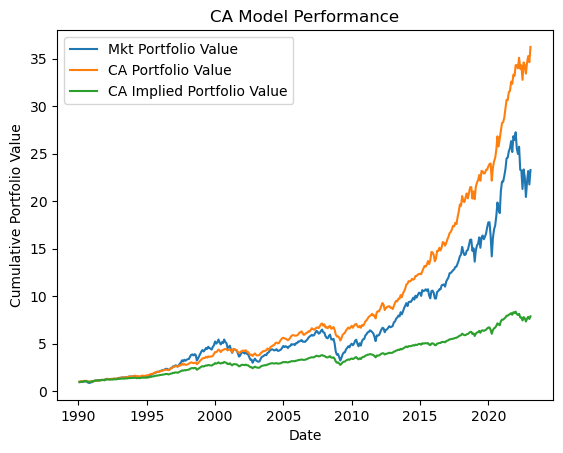

In [15]:
dates = df_total['date'] // 100 + (df_total['date'] % 100) / 12
mkt_cum_ret = (df_total['Mkt_Ret'] / 100 + 1.0).cumprod()
CA_cum_ret = (df_total['CA_Ret'] / 100 + 1.0).cumprod()
CA_MIR_cum_ret = (df_total['CA_MIR'] / 100 + 1.0).cumprod()

plt.figure()
plt.plot(dates, mkt_cum_ret, label='Mkt Portfolio Value')
plt.plot(dates, CA_cum_ret, label='CA Portfolio Value')
plt.plot(dates, CA_MIR_cum_ret, label='CA Implied Portfolio Value')

plt.title('CA Model Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Portfolio Value')

plt.legend()
plt.show()

## Part G

In part D, we estimated the alpha to be 0.398, with a P value of 0.000 < 0.05. This is backed up by graph, where the CA model significantly outperformed its implied returns calculated using the market returns and the CAPM model. Therefore, we conclude that **CA has a high alpha and is a good hedge fund strategy.** Additionally, CA has a Sharpe Ratio of 0.28, higher than the market portfolio's of 0.15. 

## Problem 2
### Part A

In [16]:
def run_analysis(strat):
    label_ret = f'{strat}_Ret'
    label_mir = f'{strat}_MIR'
    df_total[label_ret] = df_total[strat] + df_total['RF']
    avg_monthly_ret =  df_total[label_ret].mean()
    monthly_vol = df_total[label_ret].std()

    print(f"{strat} Avg monthly return: {avg_monthly_ret}")
    print(f"{strat} Volatility: {monthly_vol}")
    print(f"{strat} Sharpe Ratio: {df_total[strat].mean() / monthly_vol}")

    model = capm(df_total[strat])
    alpha = model.params[0]
    beta = model.params[1]
    print("alpha: ", alpha, " beta: ", beta)
    print()
    print(model.summary())
    implied_returns = df_total['RF'] + beta * df_total['Mkt-RF']
    df_total[f'{strat}_MIR'] = implied_returns

    dates = df_total['date'] // 100 + (df_total['date'] % 100) / 12
    mkt_cum_ret = (df_total['Mkt_Ret'] / 100 + 1.0).cumprod()
    CA_cum_ret = (df_total[label_ret] / 100 + 1.0).cumprod()
    CA_MIR_cum_ret = (df_total[label_mir] / 100 + 1.0).cumprod()

    plt.figure()
    plt.plot(dates, mkt_cum_ret, label='Mkt Portfolio Value')
    plt.plot(dates, CA_cum_ret, label=f'{strat} Portfolio Value')
    plt.plot(dates, CA_MIR_cum_ret, label=f'{strat} Implied Portfolio Value')

    plt.title(f'{strat} Model Performance')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Portfolio Value')

    plt.legend()
    plt.show()


LBHA Avg monthly return: 0.6944350857394117
LBHA Volatility: 2.1102484602603764
LBHA Sharpe Ratio: 0.23027924431801117
alpha:  0.48284673139459955  beta:  0.004508928165361609

                            OLS Regression Results                            
Dep. Variable:                   LBHA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.03671
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.848
Time:                        16:41:13   Log-Likelihood:                -854.63
No. Observations:                 397   AIC:                             1713.
Df Residuals:                     395   BIC:                             1721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

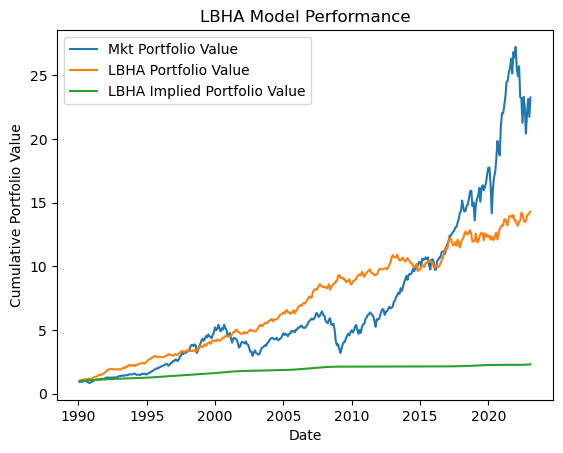

In [17]:
run_analysis("LBHA")

**The "low beta high alpha" strategy did not beat the market**, though it performed very well relative to the CAPM implied returns, which is confirmed by its statistically significant alpha of 0.48 with P-value 0.000. Since the market generally did very well from 1990 to 2023, it makes sense that a strategy with the low beta of 0.0045, which is not very correlated to the market, would not do as well. We note that LBHA continued to go up while the market portfolio tanked in 2020, which is evidence that the portfolio is well hedged.

## Part B

LSA Avg monthly return: 0.9571158486104012
LSA Volatility: 3.166802790724031
LSA Sharpe Ratio: 0.2363984223507129
alpha:  0.47944385516804494  beta:  0.39156449287928874

                            OLS Regression Results                            
Dep. Variable:                    LSA   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     171.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           8.05e-33
Time:                        16:43:44   Log-Likelihood:                -949.50
No. Observations:                 397   AIC:                             1903.
Df Residuals:                     395   BIC:                             1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

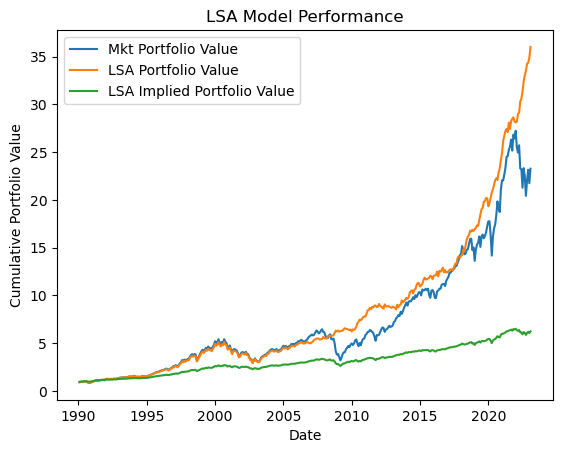

In [18]:
run_analysis("LSA")

**The "late start alpha" strategy produces positive and significant alpha, with a P-value of 0.000 < 0.05.** While there are some small deviations, the LSA strategy seems very strongly correlated with the market with beta = 0.3916, which could be a concern to potential clients as they likely came to a hedge fund for a less market-correlated portfolio.

We could allay these concerns by telling them that we actively select the portfolio, and its correlation to the market in the previous years was because we had our own signal and strong conviction that the market would go up those years. We could point to 2021 and 2022, when the LSA strategy returns diverged from the market and continued to go up, as evidence that our active management of the portfolio caused it to be well hedged in a difficult economy despite its historically high correlation to the market.

### Part C

TA Avg monthly return: 0.961229083199465
TA Volatility: 3.4560546270889057
TA Sharpe Ratio: 0.21780339127512738
alpha:  0.40367260082652145  beta:  0.5077675637624897

                            OLS Regression Results                            
Dep. Variable:                     TA   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     296.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           5.30e-50
Time:                        16:45:56   Log-Likelihood:                -944.03
No. Observations:                 397   AIC:                             1892.
Df Residuals:                     395   BIC:                             1900.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

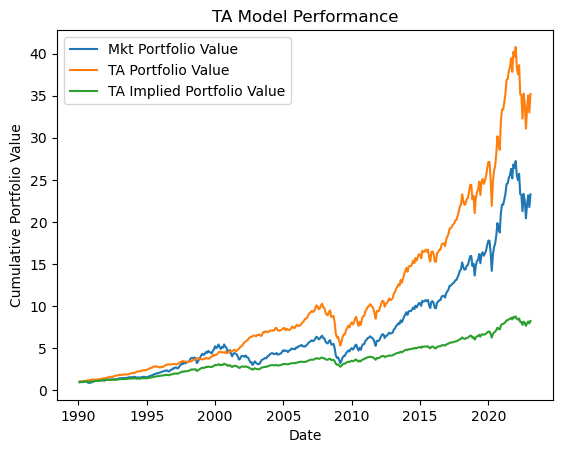

In [19]:
run_analysis("TA")

**The "tapering alpha" strategy produces positive and significant alpha, with a P-value of 0.003 < 0.05.**

While it has a positive alpha, the TA strategy has a high beta of 0.5078, and based on the graph appears to be very correlated to the market cumulative returns in the last decade. As we discussed in class, beta is "free", and we could basically duplicate the performance of this strategy in the last decade without the hedge fund level fees by purchasing a leveraged market portfolio such as SPXL. Compared to other strategies with similar alpha such as LBHA and LSA, investors would likely be less interested in this strategy due to its high beta.

### Part D

High Volatility
HV Avg monthly return: 0.9217661022969041
HV Volatility: 3.8352490524445586
HV Sharpe Ratio: 0.1859794312066542
alpha:  0.1557380977148931  beta:  0.8110183123957879

                            OLS Regression Results                            
Dep. Variable:                     HV   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     3163.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.22e-190
Time:                        16:50:36   Log-Likelihood:                -660.18
No. Observations:                 397   AIC:                             1324.
Df Residuals:                     395   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

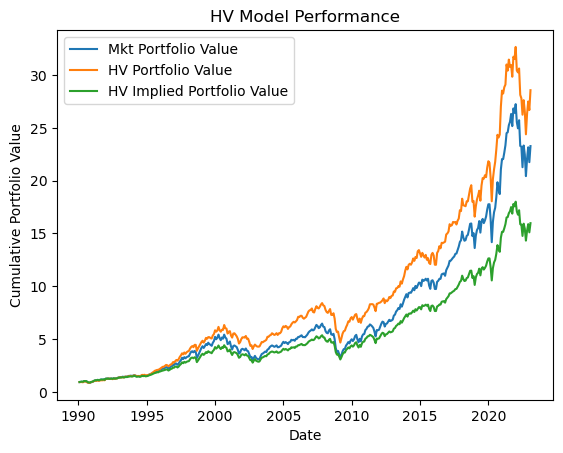

In [20]:
print("High Volatility")
run_analysis("HV")



Low Volatility
LV Avg monthly return: 0.30674602057740064
LV Volatility: 0.21473838173957863
LV Sharpe Ratio: 0.4575677379796756
alpha:  0.09868942537270564  beta:  -0.0006285054365238561

                            OLS Regression Results                            
Dep. Variable:                     LV   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3482
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.555
Time:                        16:50:39   Log-Likelihood:                 374.23
No. Observations:                 397   AIC:                            -744.5
Df Residuals:                     395   BIC:                            -736.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 co

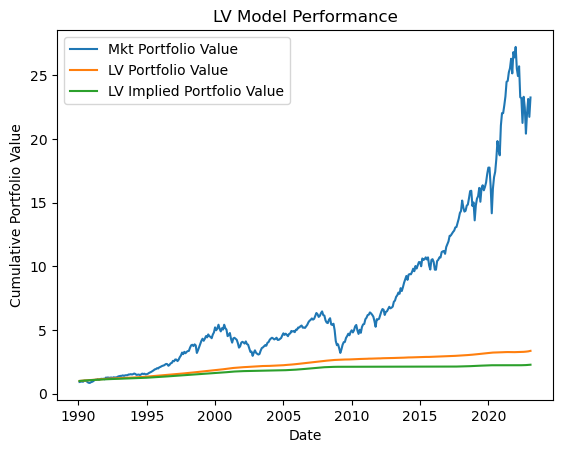

In [21]:
print("\n\nLow Volatility")
run_analysis("LV")

**As dicussed in class, risk-adverse clients would prefer the low volatility strategy.** The Sharpe ratio of the HV strategy is lower than that of the LV strategy (0.186 < 0.458), indicating that the additional risk that clients would be taking on is not nearly proportional to the additional returns they can expect.

While the HV strategy and the LV strategy both have relatively low alphas of 0.156 and 0.0987 respectively, the HV strategy has a much higher beta of 0.811, while the LV strategy has a much more attractive beta of -0.00063, making it ever so slightly anti-correlated to the market.

### Part E

Negative Alpha
NA Avg monthly return: 0.15580940226395068
NA Volatility: 2.6908155400785394
NA Sharpe Ratio: -0.019577433658613873
alpha:  -0.4046399510440173  beta:  0.5119756458422369

                            OLS Regression Results                            
Dep. Variable:                     NA   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     1002.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.09e-110
Time:                        16:56:01   Log-Likelihood:                -705.74
No. Observations:                 397   AIC:                             1415.
Df Residuals:                     395   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

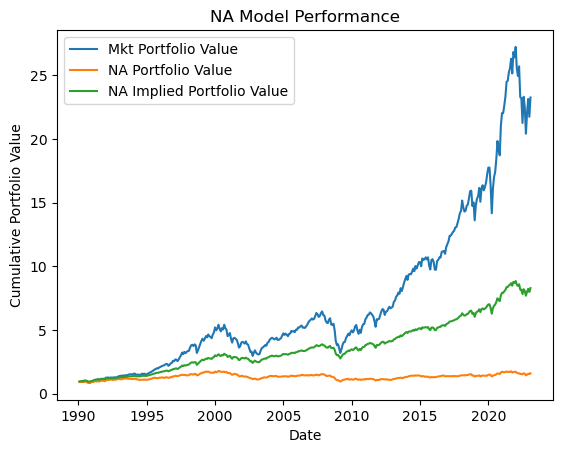

In [22]:
print("Negative Alpha")
run_analysis("NA")

**This work was not all for nothing!** We can just short everything they were long and vice versa, negating our position on every asset in the portfolio and as a result all of the returns. Then, we will have statistically significant positive alpha.

### Part F

Low Beta
LB Avg monthly return: 0.6758036490179018
LB Volatility: 1.9407064641091885
LB Sharpe Ratio: 0.24079632477804958
alpha:  0.45294259298116196  beta:  0.020906636547654286

                            OLS Regression Results                            
Dep. Variable:                     LB   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9269
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.336
Time:                        16:56:53   Log-Likelihood:                -822.72
No. Observations:                 397   AIC:                             1649.
Df Residuals:                     395   BIC:                             1657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std e

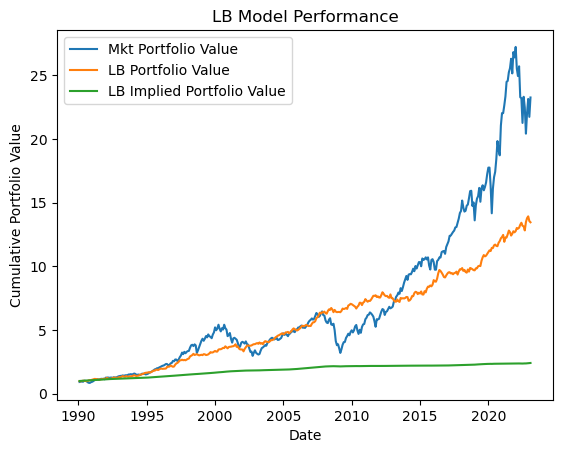

High Beta
HB Avg monthly return: 2.6418237615410876
HB Volatility: 13.375807963002822
HB Sharpe Ratio: 0.18192060646237077
alpha:  0.3724319105866749  beta:  2.9978695765385535

                            OLS Regression Results                            
Dep. Variable:                     HB   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.592e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:56:54   Log-Likelihood:                -401.32
No. Observations:                 397   AIC:                             806.6
Df Residuals:                     395   BIC:                             814.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err

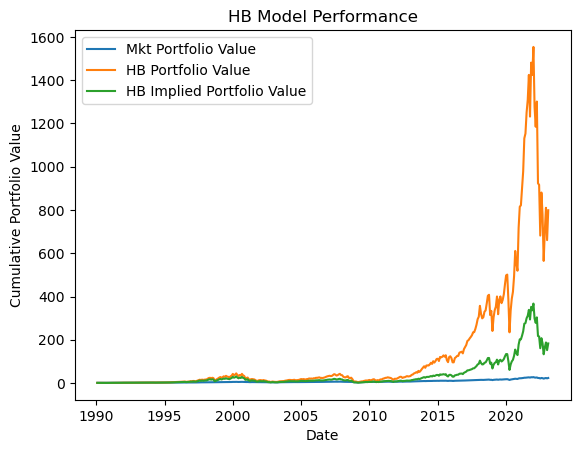

In [23]:
print("Low Beta")
run_analysis("LB")

print("High Beta")
run_analysis("HB")

**The hedge fund manager with the "low beta" strategy is likely better.**

While both of the strategies have positive and statistcially significant alpha, the alpha of the LB strategy is higher (0.45 > 0.37). Furthermore, the low beta strategy is far less exposed to the market, with a far lower beta of 0.0209 << 2.998, indicating a much more well-hedged fund with almost neutral market exposure. This can be seen in the graphs, as the 2020 COVID year massively impacted the HB fund, while the LB fund continued to increase consistently throughout the year. Finally, the Sharpe ratio of the LB strategy is larger than that of the HB strategy (0.24 > 0.18).

# Problem 3

## Part A

Low Beta
LB Avg monthly return: 0.6758036490179018
LB Volatility: 1.9407064641091885
LB Sharpe Ratio: 0.24079632477804958
alpha:  0.45294259298116196  beta:  0.020906636547654286

                            OLS Regression Results                            
Dep. Variable:                     LB   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9269
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.336
Time:                        17:01:14   Log-Likelihood:                -822.72
No. Observations:                 397   AIC:                             1649.
Df Residuals:                     395   BIC:                             1657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std e

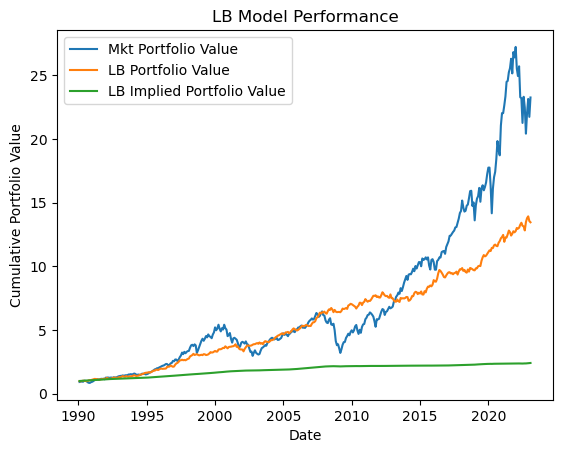

High Beta
HB Avg monthly return: 2.6418237615410876
HB Volatility: 13.375807963002822
HB Sharpe Ratio: 0.18192060646237077
alpha:  0.3724319105866749  beta:  2.9978695765385535

                            OLS Regression Results                            
Dep. Variable:                     HB   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.592e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:01:14   Log-Likelihood:                -401.32
No. Observations:                 397   AIC:                             806.6
Df Residuals:                     395   BIC:                             814.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err

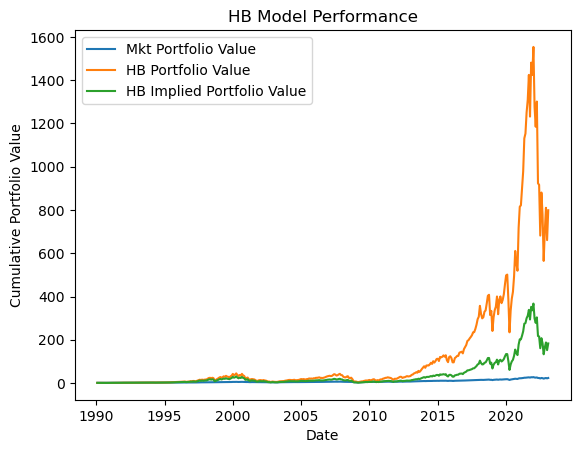

In [24]:
print("Low Beta")
run_analysis("LB")

print("High Beta")
run_analysis("HB")

## Part B

In [25]:
# Client's money 
lb_cur_money = 1
hb_cur_money = 1

# Running maximum of client's money
lb_max_money = lb_cur_money
hb_max_money = hb_cur_money

# Running sum of fees paid
lb_fees_paid = 0
hb_fees_paid = 0

# Store money and returns over time
lb_money = []
hb_money = []
lb_returns = []
hb_returns = []
for i in range(len(df_total)):
    # Store old cur money
    lb_prev_money = lb_cur_money
    hb_prev_money = hb_cur_money

    # Management fee at start of month
    lb_cur_money -= lb_cur_money * 0.0015
    hb_cur_money -= hb_cur_money * 0.0015

    lb_fees_paid += lb_cur_money * 0.0015
    hb_fees_paid += hb_cur_money * 0.0015

    # Trading gains this month
    lb_cur_money *= ((df_total['LB'] + df_total['RF'])[i] / 100 + 1.0)
    hb_cur_money *= ((df_total['HB'] + df_total['RF'])[i] / 100 + 1.0)
    
    # Subtract incentive fee
    lb_incentive_fee = 0.2 * max(0, lb_cur_money - lb_max_money)
    hb_incentive_fee = 0.2 * max(0, hb_cur_money - hb_max_money)

    lb_cur_money -= lb_incentive_fee
    hb_cur_money -= hb_incentive_fee

    lb_fees_paid += lb_incentive_fee
    hb_fees_paid += hb_incentive_fee
    
    # Update maximum and prev money
    lb_max_money = max(lb_max_money, lb_cur_money)
    hb_max_money = max(hb_max_money, hb_cur_money)

    # Append money and returns
    lb_money.append(lb_cur_money)
    hb_money.append(hb_cur_money)

    lb_returns.append((lb_cur_money / lb_prev_money - 1.0) * 100.0)
    hb_returns.append((hb_cur_money / hb_prev_money - 1.0) * 100.0)

lb_returns = np.array(lb_returns)
hb_returns = np.array(hb_returns)

lb_model = capm(pd.Series(lb_returns))
lb_alpha = lb_model.params[0]
lb_beta = lb_model.params[1]
print("lb_alpha: ", lb_alpha, " lb_beta: ", lb_beta)

hb_model = capm(pd.Series(hb_returns))
hb_alpha = hb_model.params[0]
hb_beta = hb_model.params[1]
print("hb_alpha: ", hb_alpha, " hb_beta: ", hb_beta)

lb_alpha:  0.40963499833025663  lb_beta:  0.01553869770058828
hb_alpha:  0.1117191898574652  hb_beta:  2.9234228910545665


## Part C

In [26]:
print('Total fees (calculated above):')
print(f'LB: ${10**8 * lb_fees_paid:,.0f}')
print(f'HB: ${10**8 * hb_fees_paid:,.0f}')

Total fees (calculated above):
LB: $276,088,646
HB: $7,502,050,344


**The high beta strategy has far higher fees.** Because it was postively correlated to the rising market, the high beta strategy quickly reached a portfolio value over 10-20x that of the low beta strategy. On all of the cumulative returns that lead to this high portfolio value, the hedge fund took 20% in fees, far more than the incentive fees the low beta strategy could charge. Furthermore, at a high portfolio value, even the simple management fee scales up linearly to be 10-20x as big as the low beta strategy.

## Part D
One reason that is difficult to ignore is the power of incentives. While clients value hedge funds because of alpha, that doesn't mean that beta is necessarily low. If hedge funds with high beta generate not only more fees for the fund managers, but also, on average, larger year over year return for the clients, then these high beta funds are going to attract the best talent and have the most client money to spend executing strategies. In an optimal world for them, the most skilled hedge fund managers would find a way to have the highest alpha strategy on the market, but also with a high beta, generating more fees. Furthermore, there may be a difference in the beta-appetite that clients have, and the best fund managers could look to satisfy clients willing to take on higher beta, because they know it will generate them more fees. 